# Quel equipe NBA est la meilleur en campagne de PlayOff ( gagnante )  entre 1980 et 2010 ?

Telechargement des librairies

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importation du csv

In [4]:
basket = pd.read_csv('./data/championsdata.csv')


Affichage des infos de la base de donnée

In [34]:
basket.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    220 non-null    int64  
 1   Team    220 non-null    object 
 2   Game    220 non-null    int64  
 3   Win     220 non-null    int64  
 4   Home    220 non-null    int64  
 5   MP      220 non-null    int64  
 6   FG      220 non-null    int64  
 7   FGA     220 non-null    int64  
 8   FGP     220 non-null    float64
 9   TP      220 non-null    int64  
 10  TPA     220 non-null    int64  
 11  TPP     214 non-null    float64
 12  FT      220 non-null    int64  
 13  FTA     220 non-null    int64  
 14  FTP     220 non-null    float64
 15  ORB     220 non-null    int64  
 16  DRB     220 non-null    int64  
 17  TRB     220 non-null    int64  
 18  AST     220 non-null    int64  
 19  STL     220 non-null    int64  
 20  BLK     220 non-null    int64  
 21  TOV     220 non-null    int64  
 22  PF

In [38]:
basket.head(20)

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108
5,1980,Lakers,6,1,0,240,45,92,0.489,0,...,0.943,17,35,52,27,14,4,17,22,123
6,1981,Celtics,1,1,1,240,41,95,0.432,0,...,0.800,25,29,54,23,6,5,19,21,98
7,1981,Celtics,2,0,1,240,41,82,0.500,0,...,0.615,14,34,48,17,6,7,22,27,90
8,1981,Celtics,3,1,0,240,40,89,0.449,2,...,0.632,16,28,44,24,12,6,11,25,94
9,1981,Celtics,4,0,0,240,35,74,0.473,0,...,0.667,17,30,47,22,5,6,22,22,86


In [39]:
basket.describe()

,Year,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1998.863636,3.400000,0.709091,0.504545,242.386364,37.750000,80.877273,0.466523,5.354545,14.604545,...,0.735568,12.295455,30.200000,42.495455,22.504545,7.854545,5.322727,13.709091,22.859091,100.786364
std,11.310865,1.734422,0.455217,0.501120,8.445949,6.323563,9.511753,0.054264,4.035428,9.420321,...,0.105555,4.630549,4.872437,6.459214,6.132850,2.944964,2.769770,3.872029,4.371259,13.314763
min,1980.000000,1.000000,0.000000,0.000000,240.000000,25.000000,62.000000,0.289000,0.000000,0.000000,...,0.368000,3.000000,16.000000,22.000000,11.000000,1.000000,0.000000,4.000000,12.000000,71.000000
25%,1989.000000,2.000000,0.000000,0.000000,240.000000,33.000000,75.000000,0.429750,2.000000,6.750000,...,0.667000,9.000000,27.000000,38.000000,18.000000,6.000000,3.000000,11.000000,20.000000,90.750000
50%,1999.000000,3.000000,1.000000,1.000000,240.000000,37.000000,80.000000,0.467000,5.000000,15.000000,...,0.740000,12.000000,30.000000,42.000000,22.000000,8.000000,5.000000,14.000000,23.000000,101.000000
75%,2009.000000,5.000000,1.000000,1.000000,240.000000,42.000000,87.000000,0.500000,8.000000,20.000000,...,0.815750,15.000000,33.250000,47.000000,27.000000,10.000000,7.000000,16.000000,26.000000,109.000000
max,2018.000000,7.000000,1.000000,1.000000,315.000000,56.000000,130.000000,0.617000,18.000000,43.000000,...,1.000000,27.000000,44.000000,59.000000,44.000000,18.000000,14.000000,26.000000,33.000000,141.000000


# Nbr de win par rapport au nbr de points marqué

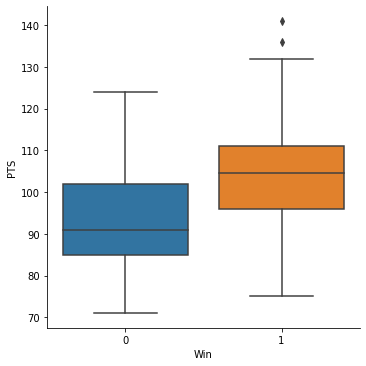

In [50]:
sns.catplot(x='Win', y='PTS', data=basket, kind='box')

Ici, on peux constater que passé un certain nombre de points le match est gagné et de meme que en dessous d'un certain nombre de point marqué le match est perdu. Tout cela montre aussi qu'il y a un tranche de points qui ne permet pas de deternimé si le match est oui ou non gagné.

Ici on va regarder si le nombre de points lors des finals à evolué avec le temps 

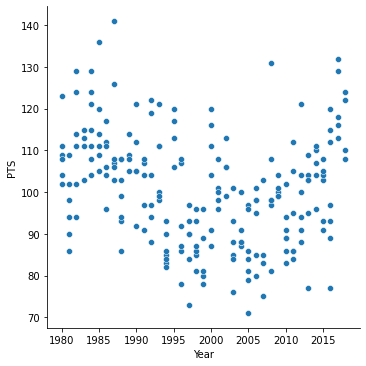

In [42]:
sns.relplot(x="Year",y="PTS",data=basket)

Ici on peux constater que le nombre de point marqué lors des final n'est pas fixe et reste assez aleatoire

# Nbr de win par rapport au nbr d'assist

Ici on va regarder si on peux voir un rapport entre le nbr de win et le nbr d'assist lors d'un match de final

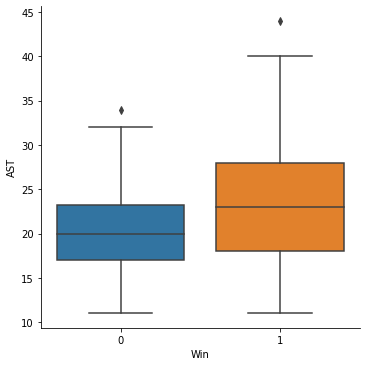

In [55]:
sns.catplot(x='Win', y='AST', data=basket, kind='box')

Ici on peux constater comme pour les points que passé un certain nombre d'assist le match et pour le plus souvent gagné, le plus souvent parce que ici il y a des valeurs extrémes comme environ 35 assist alors que le match est perdu.

# Nbr de win par rapport au nbr de rebond

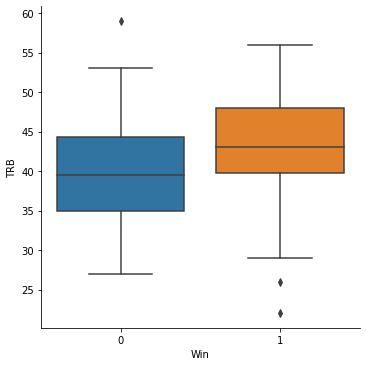

In [56]:
sns.catplot(x='Win', y='TRB', data=basket, kind='box')

Ici on peux constater que le nombre de rebond lors d'un match influence un peu moins le resultat de celui-ci, et possede plus de valeurs extremes qui fausse tout affirmation que l'on pourrai faire sur un rapport entre les deux valeur.

Apres avoir regarder les differents evaluateurs de reussite lors d'un match, on peut constater que celui qui semble avoir le plus d'influence est les points marqué par match suivit par les assists

# Nombre de points par Team

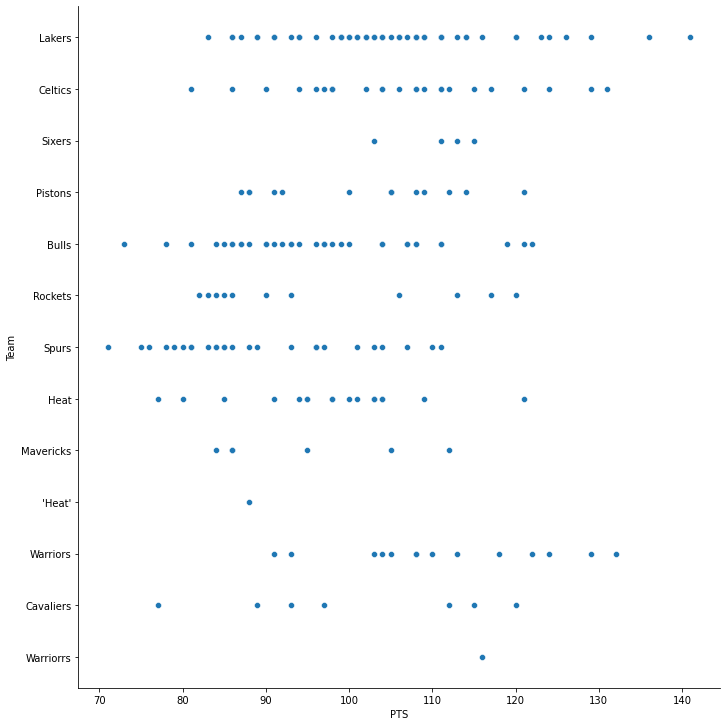

In [71]:
sns.relplot(x="PTS",y="Team",data=basket ,  height=10)

On constat que les lakers possedent le record du plus de point en final 

# Nombre d'assists par Team

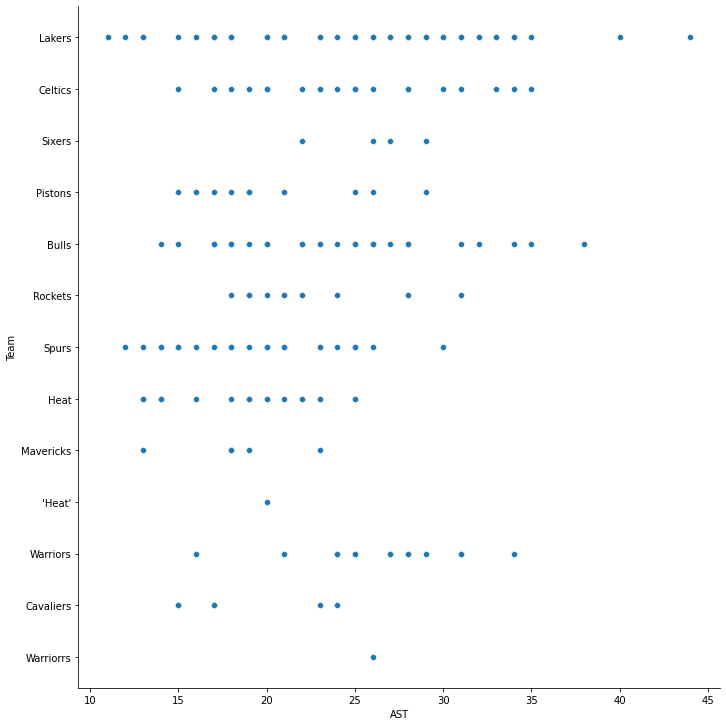

In [5]:
sns.relplot(x="AST",y="Team",data=basket ,  height=10)

Ici aussi on constat que les Lakers possedent le record du nombre d'assist en final

# Le nombre de game en final par Team 

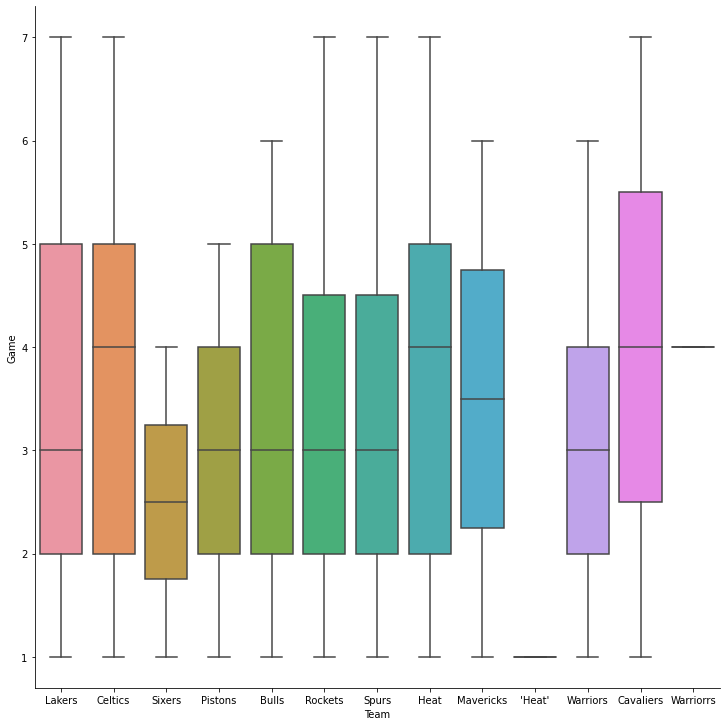

In [68]:
sns.catplot(x='Team', y='Game', data=basket, kind='box',  height=10)

Ici on peux constater que les Sixers possede un moyenne de 4 match en final, ce qui est le minimun en final pour gagner le titre, il ont une moyenne parfaite.

# Moyenne de win par team

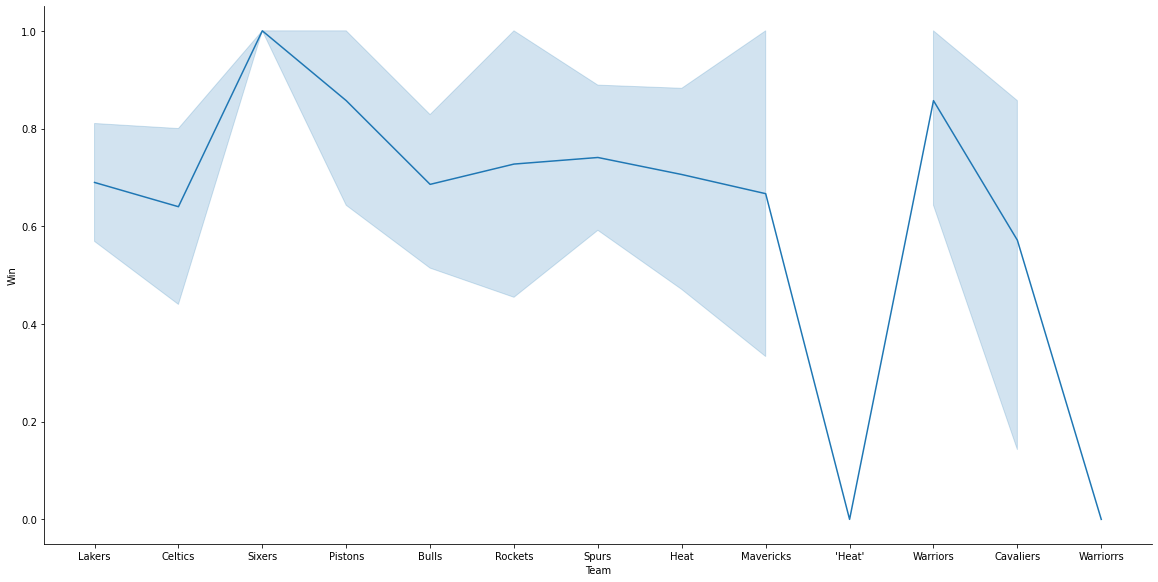

In [18]:
sns.relplot(x='Team', y='Win', data=basket, kind='line',height=8, aspect=2)

On peut remarquer ici que Les sixers ont une moyenne de win parfaite sans variance donc pour comprendre cet moyenne on va regarder leurs nombres de participation.
Alors que a coté les Lakers on une plus petite moyenne mais possede un grande variance.

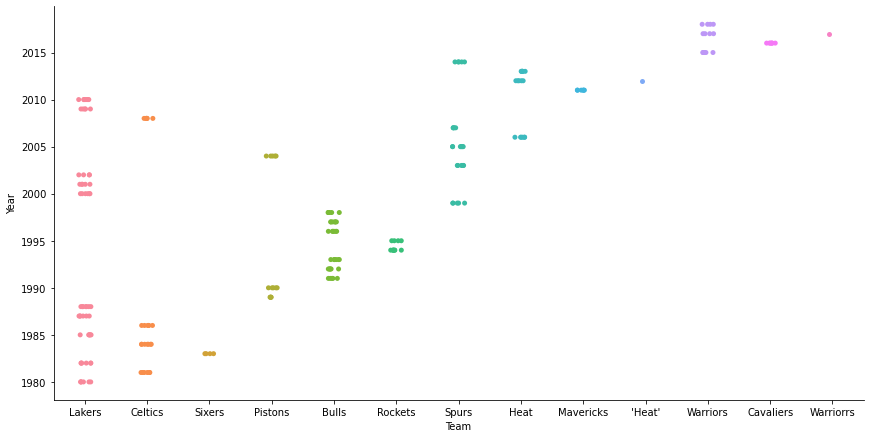

In [17]:
sns.catplot(x='Team', y='Year', data=basket,height=6, aspect=2)

Ici on constat que les sixers ont une seul saison où ils sont allée en final d'ou leurs moyenne parfaite car durant celle-ci il ont gagné tout leurs matchs

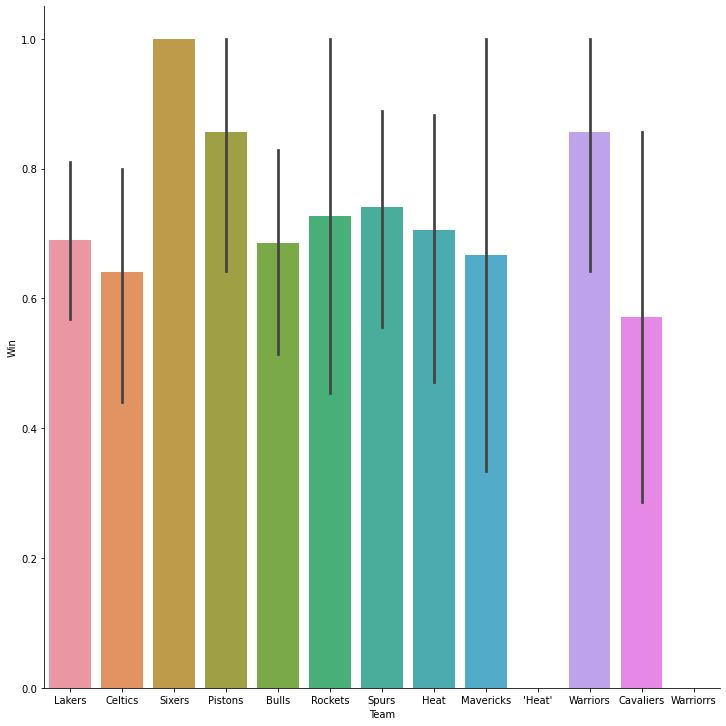

In [12]:
sns.catplot(x="Team", y="Win", data= basket, kind="bar", height=10)

Ce graphique nous montre bien que les Sixers on fait durant leurs seul saison en playOff un score parfait

# Nombre de match par Team

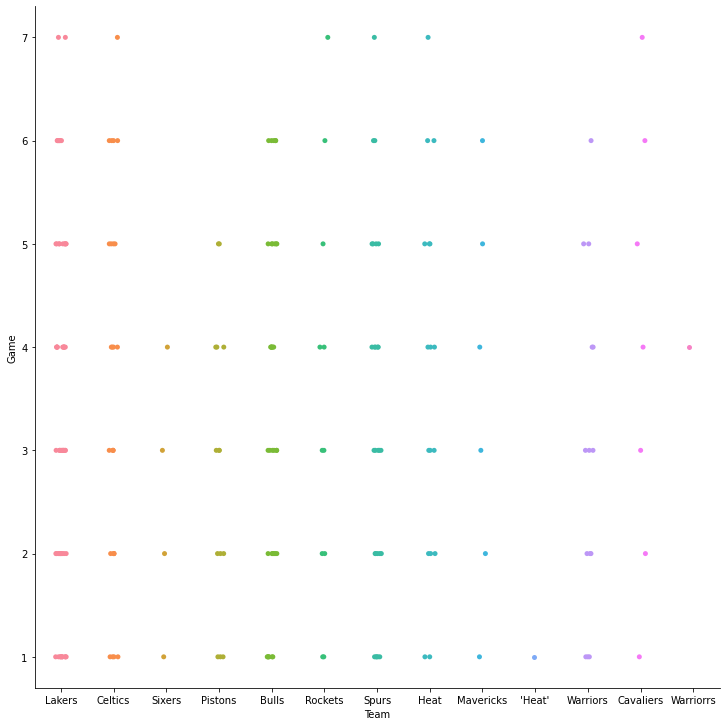

In [16]:
sns.catplot(x='Team', y='Game', data=basket ,height=10, aspect=1)

Ici on compare le nombre de match par Team et on voit que les Lakers on fait le plus de match 

# Conclusion

    On a pu voir que Les sixers on effectué une serie de playOff parfait mais en oont fdait qu'un seul, aloors que les Lakers qui eu on participé beaucoup plus de fois possede le plus de record de points et d'assist qui ont l'air d'etre l'une des variable de victoire.
    Donc on peut dire que Les Lakers sont ceux qui sont les plus regulier en playoff et font les meilleur resultat lors de celle-ci. 
    Alors que les Sixers ont quand a eu fait une seul serie mais possede un resultat parfait.